In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset
df = pd.read_csv(r'C:\Users\isama\Desktop\dataset1\car data.csv')


In [2]:
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [3]:
print(df.describe())


              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


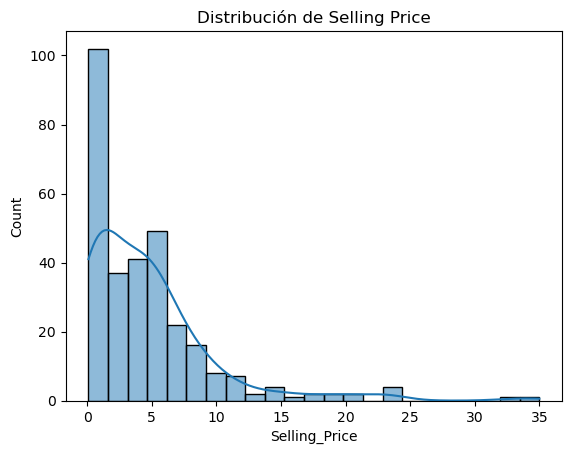

In [5]:
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribución de Selling Price')
plt.show()


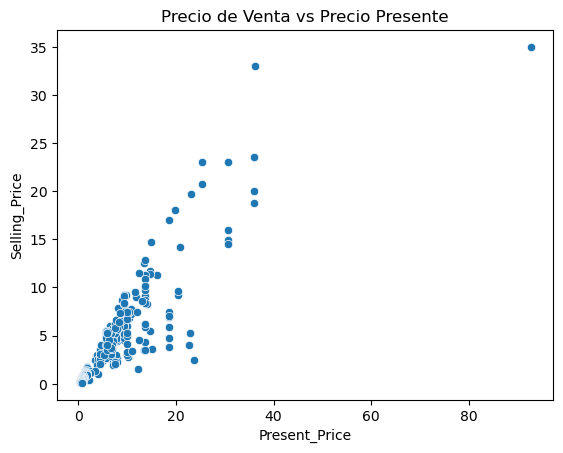

In [6]:
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Precio de Venta vs Precio Presente')
plt.show()


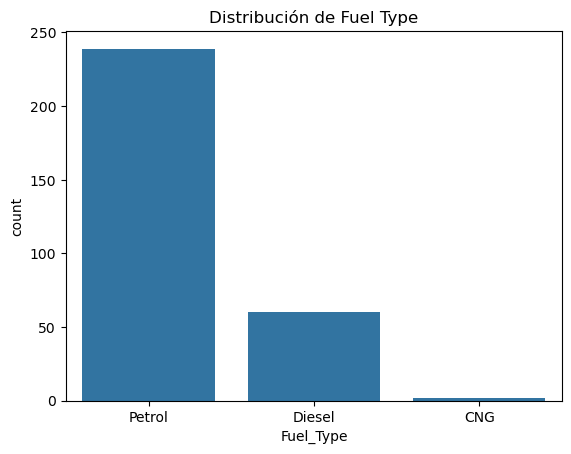

In [7]:
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribución de Fuel Type')
plt.show()


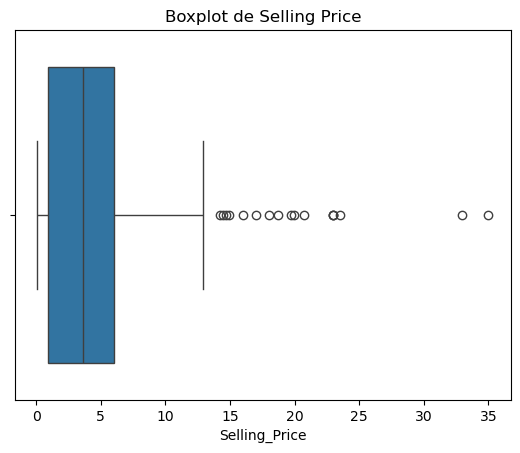

In [8]:
sns.boxplot(x='Selling_Price', data=df)
plt.title('Boxplot de Selling Price')
plt.show()


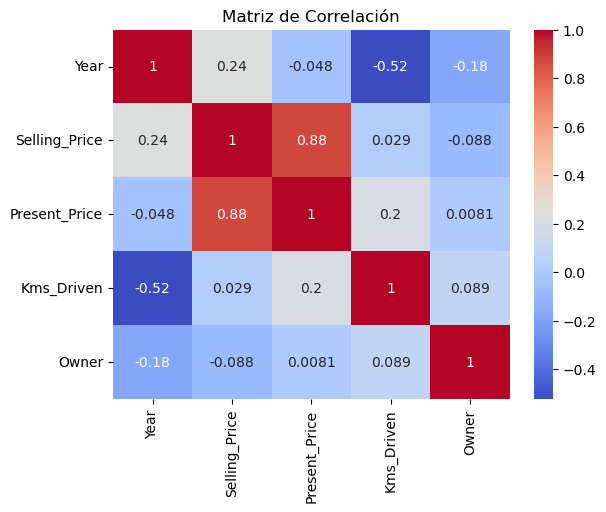

In [10]:
# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



In [16]:
# Verificación de valores faltantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [19]:
# Conversión de columnas categóricas a tipo 'category'
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Seller_Type'] = df['Seller_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')


In [20]:
# Verificación de tipos de datos
print(df.dtypes)


Car_Name           object
Year                int64
Selling_Price     float64
Present_Price     float64
Kms_Driven          int64
Fuel_Type        category
Seller_Type      category
Transmission     category
Owner               int64
dtype: object


In [21]:
duplicates = df.duplicated()
print(duplicates.sum())  # Cuenta el número de filas duplicadas


2


In [22]:
df.drop_duplicates(inplace=True)


In [23]:
print(df.duplicated().sum())  # Debería mostrar 0


0


In [25]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()
print(correlation_matrix['Selling_Price'].sort_values(ascending=False))


Selling_Price    1.000000
Present_Price    0.876378
Year             0.234369
Kms_Driven       0.028566
Owner           -0.087880
Name: Selling_Price, dtype: float64


In [27]:
# Seleccionar las características relevantes
X = df[['Present_Price', 'Year']]  # Variables que usarás para predecir
y = df['Selling_Price']  # Variable que quieres predecir


In [28]:
# Verificar las primeras filas de X e y
print(X.head())
print(y.head())


   Present_Price  Year
0           5.59  2014
1           9.54  2013
2           9.85  2017
3           4.15  2011
4           6.87  2014
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(239, 2) (60, 2)
(239,) (60,)


In [30]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 6.762495848516185
R² Score: 0.7376158365127163


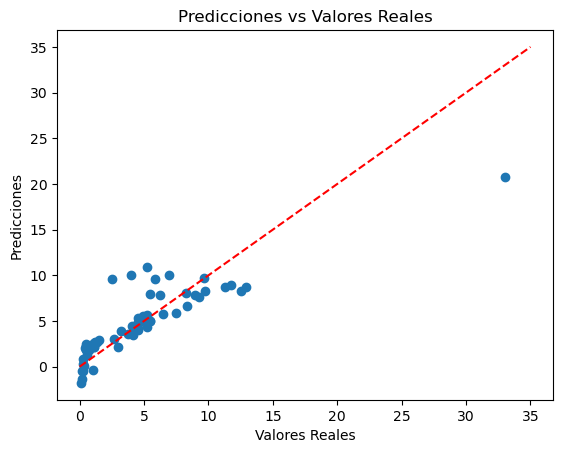

In [32]:
import matplotlib.pyplot as plt

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([0, 35], [0, 35], 'r--')  # Línea diagonal
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
model = LinearRegression()


In [35]:
model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 6.762495848516185
R² Score: 0.7376158365127163


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression


In [39]:
# Definir X e y
X = df[['Present_Price', 'Year']]  # Seleccionamos las características
y = df['Selling_Price']  # Variable objetivo


In [40]:
# Aplicar SelectKBest
selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = selector.get_support(indices=True)
selected_columns = X.columns[selected_features]
print(selected_columns)


Index(['Present_Price', 'Year'], dtype='object')


In [41]:
# Definir características y variable objetivo
X = df[['Present_Price', 'Year']]
y = df['Selling_Price']


In [42]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [44]:
# Predecir los precios de venta en los datos de prueba
y_pred = model.predict(X_test)

# Mostrar las predicciones
print(y_pred)


[ 7.82240784  6.5948635   2.06829377  5.92062361 10.89161087  4.37596366
  9.59064079  2.55419674  7.67226057  0.04585867  9.67429607 -0.52455143
 -0.51943666  2.48168049  4.40756176  5.29662191  2.26776973  2.69741024
 20.74651722  1.78789102  1.78789102  2.69411447  5.67420525 -0.37769995
  5.05202254  8.31433506  8.09019476  2.11012141  4.87993941  5.30867044
  3.96166745  5.00508013  5.05202254  2.19559568  3.00191004  5.7620658
  2.11012141 -1.37689871  2.50304906 10.00857498  8.00926797  8.24272831
  2.43144231  2.95894781  1.77766149 -1.77494112  8.74306609  4.20297104
  3.97371597  0.33291061  1.33205173  0.79233024  9.6370159   8.74306609
  7.88560404  5.49700736  3.54498495  3.50315731  8.92299246 10.01937181]


In [45]:
import pandas as pd

# Crear un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Mostrar los primeros resultados
print(results.head())


     Actual  Predicted
283    8.99   7.822408
267    8.35   6.594864
166    0.45   2.068294
9      7.45   5.920624
78     5.25  10.891611


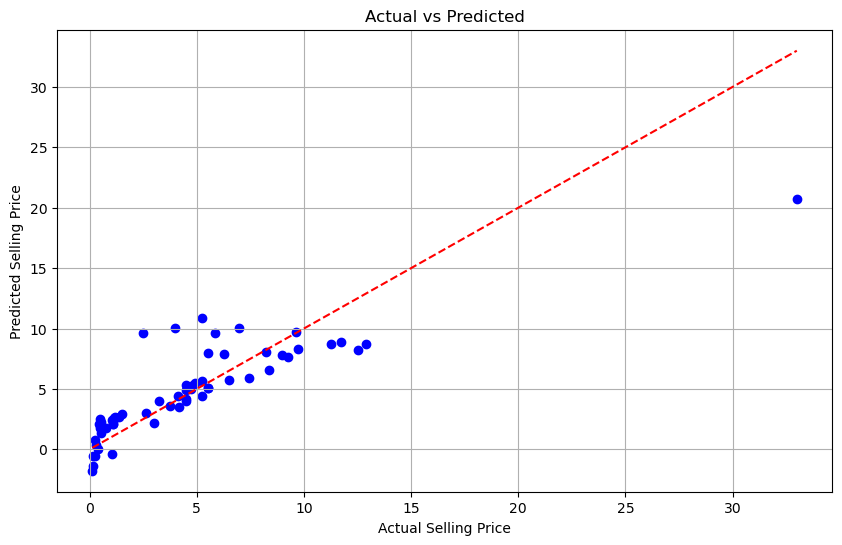

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue')
plt.plot([results['Actual'].min(), results['Actual'].max()], 
         [results['Actual'].min(), results['Actual'].max()], 
         color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid(True)
plt.show()


In [47]:
from sklearn.model_selection import train_test_split


In [48]:
X = df[['Present_Price', 'Year']]
y = df['Selling_Price']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')


Train set: (239, 2), (239,)
Test set: (60, 2), (60,)


In [51]:
from sklearn.linear_model import LinearRegression


In [52]:
model = LinearRegression()


In [53]:
model.fit(X_train, y_train)


LinearRegression()

In [54]:
y_pred = model.predict(X_test)


In [55]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 6.762495848516185
R² Score: 0.7376158365127163


In [56]:
from sklearn.metrics import mean_absolute_error

# Calcular el Error Absoluto Medio
mae = mean_absolute_error(y_test, y_pred)

# Imprimir resultados
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 1.6671507327674162


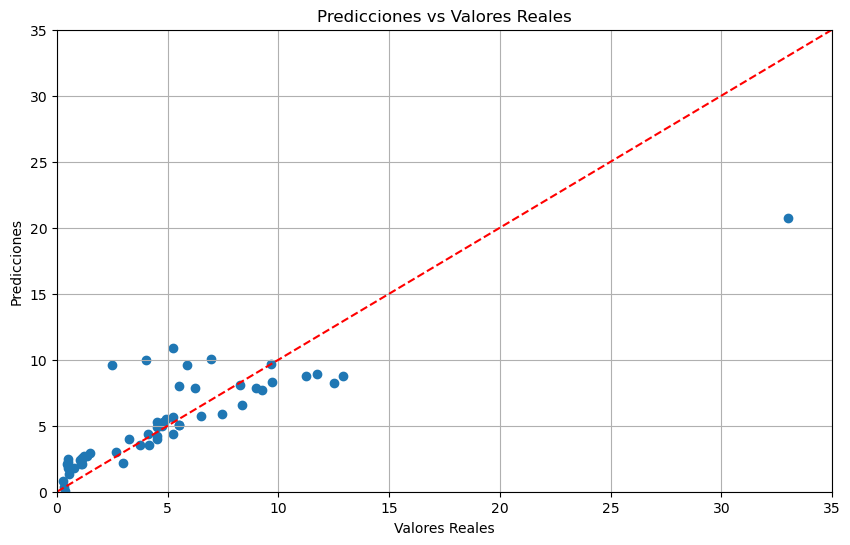

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 35], [0, 35], '--r')  # línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.xlim(0, 35)
plt.ylim(0, 35)
plt.grid()
plt.show()
